#**ACCIDENTALIDAD EN BARRANQUILLA**

El objetivo de este informe es realizar un análisis exploratorio de la base de datos de accidentes de tránsito en Barranquilla. Este análisis se centrará en identificar patrones y tendencias clave en los datos, tales como la frecuencia de accidentes, la gravedad de los incidentes y la distribución temporal, así como las principales causas y factores asociados. Los hallazgos obtenidos servirán para comprender mejor la situación actual y proporcionar una base sólida para la toma de decisiones informadas en la mejora de la seguridad vial en la ciudad.


**Datos:**

La base de datos sobre accidentalidad en Barranquilla, contiene información sobre 31542 accidentes de tránsito ocurridos en el distrito de Barranquilla durante el período del primero de enero  del 2015 hasta el 29 de febrero del 2020, según los informes policiales de accidentes de tránsito (IPAT). La información de la vigencia actual es preliminar y está sujeta a cambios.

**Las variables se codificaron como:**

- __FECHA_ACCIDENTE:__ Es la fecha de ocurrencia del accidente de tránsito en día, mes , año y hora en Barranquilla.
- __AÑO_ACCIDENTE:__ Es el año de ocurrencia del accidente de tránsito en Barranquilla.
- __MES_ACCIDENTE:__ Es el mes de ocurrencia del accidente de tránsito.
- __DIA_ACCIDENTE:__ Es el dia de la semana en que ocurrió el accidente de tránsito (lunes, martes, miércoles,jueves, viernes,sábado y domingo).
- __HORA_ACCIDENTE:__ Es la hora del día en que ocurrió el accidente de tránsito.
- __GRAVEDAD_ACCIDENTE:__ Los daños causados por el accidente.
- __CLASE_ACCIDENTE:__ Que tipo de accidente ocurrio si fue por (choque, atropellado, etc).
- __SITIO_EXACTO_ACCIDENTE:__ Lugar donde ocurrio el accidente de tránsito.
- __CANT_HERIDOS_EN _SITIO_ACCIDENTE:__ Cantidad de personas heridas en el sitio del accidente de tránsito.
- __CANT_MUERTOS_EN _SITIO_ACCIDENTE:__ Cantidad de personas fallecidas en el sitio del accidente de tránsito.
- __CANTIDAD_ACCIDENTES:__ Cuantos accidentes se registraron por día.

**Fuente de los datos:** https://www.datos.gov.co/Transporte/Accidentalidad-en-Barranquilla/yb9r-2dsi/about_data

##**1. Importación de base de datos**
Se importa base de datos en formato CSV

In [ ]:
# Leemos e importamos la base de datos
import pandas as pd
datos= "/content/drive/MyDrive/Colab Notebooks/CD BASIC/Accidentalidad_en_Barranquilla_2024.csv"
Datos= pd.read_csv(datos, header=0)
Datos.head()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
0,2018-01-01T00:00:00.000,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,NaN,1,2018,January,Mon
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1,2018,January,Mon


Dimensiones de la base de datos

In [ ]:
# Dimensiones de la base de datos, (número de filas, número de columnas)
Datos.shape

(25610, 11)

Nombres de las columnas

In [ ]:
# Nombres de las columnas
Datos.columns

Index(['FECHA_ACCIDENTE', 'HORA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE',
       'CLASE_ACCIDENTE', 'SITIO_EXACTO_ACCIDENTE',
       'CANT_HERIDOS_EN _SITIO_ACCIDENTE', 'CANT_MUERTOS_EN _SITIO_ACCIDENTE',
       'CANTIDAD_ACCIDENTES', 'AÑO_ACCIDENTE', 'MES_ACCIDENTE',
       'DIA_ACCIDENTE'],
      dtype='object')

Características generales de la base de datos importada

In [ ]:
Datos.info() # estrutura de la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25610 entries, 0 to 25609
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   25610 non-null  object 
 1   HORA_ACCIDENTE                    25610 non-null  object 
 2   GRAVEDAD_ACCIDENTE                25610 non-null  object 
 3   CLASE_ACCIDENTE                   25610 non-null  object 
 4   SITIO_EXACTO_ACCIDENTE            25610 non-null  object 
 5   CANT_HERIDOS_EN _SITIO_ACCIDENTE  9984 non-null   float64
 6   CANT_MUERTOS_EN _SITIO_ACCIDENTE  252 non-null    float64
 7   CANTIDAD_ACCIDENTES               25610 non-null  int64  
 8   AÑO_ACCIDENTE                     25610 non-null  int64  
 9   MES_ACCIDENTE                     25610 non-null  object 
 10  DIA_ACCIDENTE                     25610 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ MB


##**2. Procesamiento de datos:**

**Limpieza de los nombres** con la librería pyjanitor

In [ ]:
pip install pyjanitor #Instalar Pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Importamos el módulo janitor para obtener la propiedad de transformación de columnas
import janitor as jan
#Limpiamos los nombres de la base de datos
Datos=jan.clean_names(Datos)
Datos.head()

,fecha_accidente,hora_accidente,gravedad_accidente,clase_accidente,sitio_exacto_accidente,cant_heridos_en_sitio_accidente,cant_muertos_en_sitio_accidente,cantidad_accidentes,ano_accidente,mes_accidente,dia_accidente
0,2018-01-01T00:00:00.000,01:30:00:am,Con heridos,Atropello,CL 87 9H 24,1.0,NaN,1,2018,January,Mon
1,2018-01-01T00:00:00.000,02:00:00:pm,Solo daños,Choque,CL 110 CR 46,NaN,NaN,1,2018,January,Mon
2,2018-01-01T00:00:00.000,04:00:00:am,Solo daños,Choque,AV CIRCUNVALAR CR 9G,NaN,NaN,1,2018,January,Mon
3,2018-01-01T00:00:00.000,04:30:00:am,Solo daños,Choque,CLLE 72 CRA 29,NaN,NaN,1,2018,January,Mon
4,2018-01-01T00:00:00.000,05:20:00:pm,Solo daños,Choque,VIA 40 CALLE 75,NaN,NaN,1,2018,January,Mon


###**2.1 Tabla de operacionalización de variables**

In [ ]:
# Nombre y Tipo de las Variables

dict1={  "Macro Variable":["Fecha del accidente","Año del accidente", "Mes del accidente", "Día del accidente", "hora del accidente", "Gravedad del accidente", "Clase de accidente", "Sitio exacto del accidente","Cant. Heridos en el sitio del accidente","Cant. Muertos en el sitio del accidente","Cantidad de Accidentes"],

       "Tipo":["Cualitativa Ordinal", "Cualitativa ordinal","Cualitativa Ordinal","Cualitativa Ordinal","Cuantitiva Continua","Cualitativa Nominal","Cualitativa Nominal","Cualitativo Nominal","Cuantitativas Discretas","Cuantitativas Discretas","Cuantitativas Discretas"],
}

df1=pd.DataFrame(dict1)
df1

,Macro Variable,Tipo
0,Fecha del accidente,Cualitativa Ordinal
1,Año del accidente,Cualitativa ordinal
2,Mes del accidente,Cualitativa Ordinal
3,Día del accidente,Cualitativa Ordinal
4,hora del accidente,Cuantitiva Continua
5,Gravedad del accidente,Cualitativa Nominal
6,Clase de accidente,Cualitativa Nominal
7,Sitio exacto del accidente,Cualitativo Nominal
8,Cant. Heridos en el sitio del accidente,Cuantitativas Discretas
9,Cant. Muertos en el sitio del accidente,Cuantitativas Discretas


###**2.2 Detección de NAs y Valores atípicos**

En primer lugar, se detectan aquellas variables con NAs.
Detectar los valores nulos (NAs) en un análisis de datos es crucial para garantizar la calidad y la integridad de la información. Los NAs pueden sesgar resultados, afectar la precisión de técnicas estadísticas y ocultar patrones importantes.

In [ ]:
Datos.isna().sum() # Cuenta cuántos valores NA hay por cada variable del estudio
#datos NA en cada variable

,0
fecha_accidente,0
hora_accidente,0
gravedad_accidente,0
clase_accidente,0
sitio_exacto_accidente,0
cant_heridos_en_sitio_accidente,15626
cant_muertos_en_sitio_accidente,25358
cantidad_accidentes,0
ano_accidente,0
mes_accidente,0


Gráfico de NAs

<Axes: >

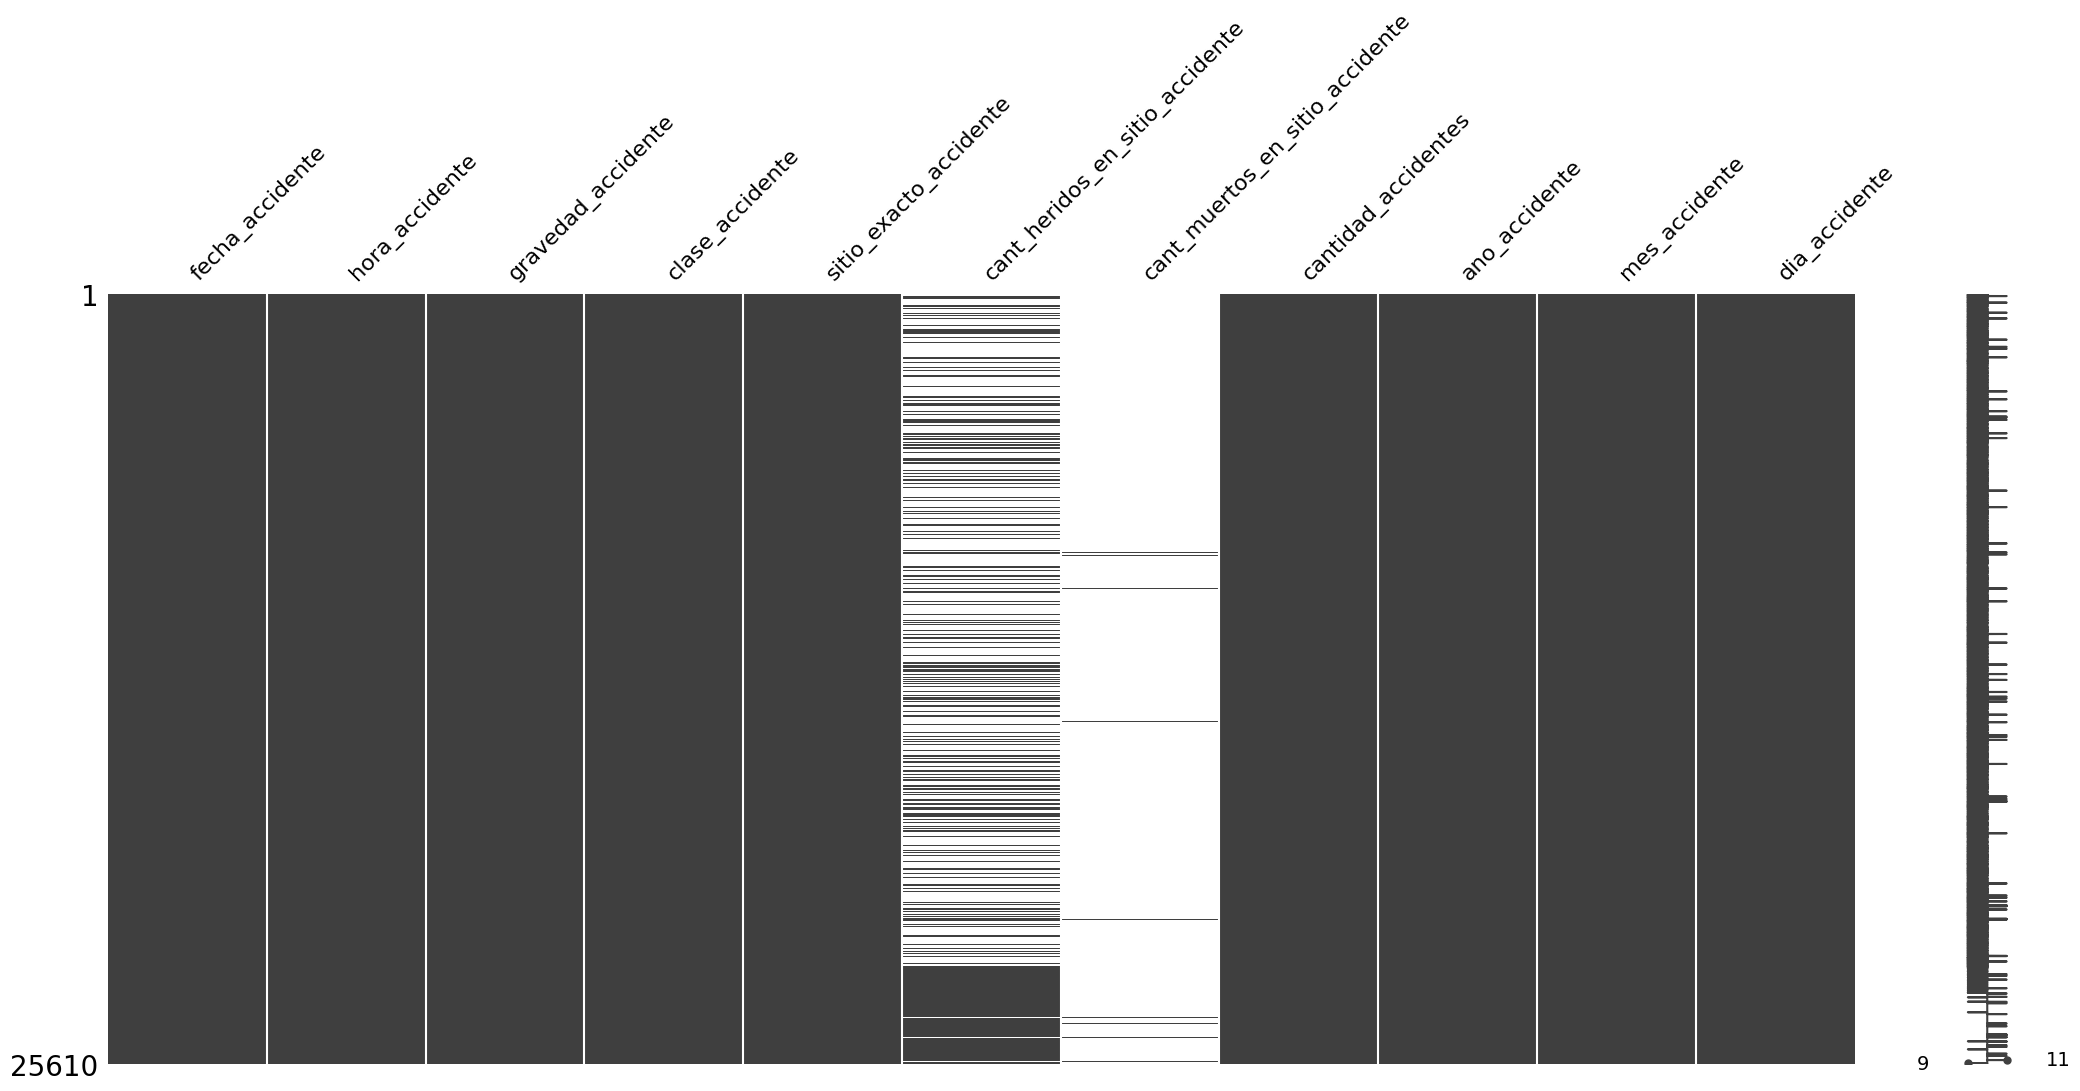

In [ ]:
import missingno as msno
msno.matrix(Datos)

Si análizamos de manera general la estrutura de la base de datos, las variables cantidad de heridos del accidente y cantidad de muertos del accidente contienen 15.626 y 23.358 valores NA.

Por su parte, la variable sitio exacto del accidente tiene 25.610 observaciones,**era de  esperase que las variables antes mencionadas tuvieran una gran cantidad de observaciones vacíaas ya que pudo ocurrir varios eventos: no hubo heridos, no hubo fallecidos o en el peor de los casos no se digitó la información**, se hace necesario consultar con el experto para tomar una decisión con respecto a los datos faltantes correspondientes a estas dos variables.


**Detección de valores atípicos para la variable numérica:**

Un 25% de la cantidad de heridos en el sitio del accidente superan los 2 lesionados, este conjunto de datos se manifiestan como valores altos en comparación con la mayoría de las observaciones, además se ubican a la derecha de la media y la mediana, estos argumentos nos dan indicios de que estas variables tiene un sesgo positivo. La cantidad de muertos parece no tener datos atípicos.

Como estadisticos se sugiere no retirar estas observaciones ya que pueden brindar información sobre la variable de interés.

In [ ]:
Datos.loc[:,["cant_heridos_en_sitio_accidente","cant_muertos_en_sitio_accidente"]].describe()

,cant_heridos_en_sitio_accidente,cant_muertos_en_sitio_accidente
count,9984.000000,252.000000
mean,1.471655,1.035714
std,1.156751,0.185946
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,42.000000,2.000000


<Axes: >

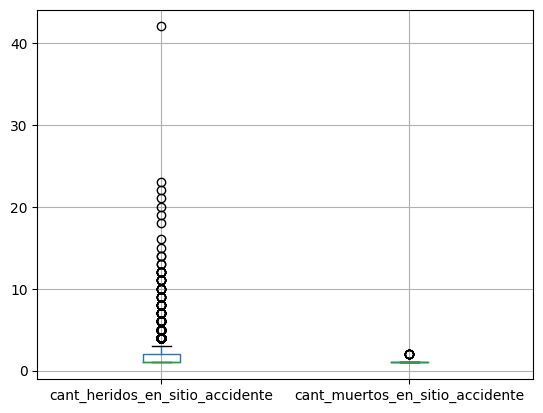

In [ ]:
#Procedamos con la identificación de los datos atípicos
Datos["sitio_exacto_accidente"].describe()
Datos.boxplot(column=["cant_heridos_en_sitio_accidente","cant_muertos_en_sitio_accidente"])

Teniendo en cuenta la naturaleza de las variables y que los valores faltantes pueden ser justificados, se decidirá mantenerlos y mantener la distribución tal cual.

##**3. Análisis descriptivo de las variables:**

Para proceder con el análisis a través de tablas y gráficos descriptivos, se convirtieron las variables correspondientes a año del accidente y mes del accidente en objetos y se realizó un **descriptivo de las variables numéricas:**

In [ ]:
#convertir variables año del accidente y mes del accidente en objetos
Datos['ano_accidente']=Datos['ano_accidente'].astype(object)
Datos['mes_accidente']=Datos['mes_accidente'].astype(object)

# Análisis de las variables Númericas
round(Datos.describe(),2)

,cant_heridos_en_sitio_accidente,cant_muertos_en_sitio_accidente,cantidad_accidentes
count,9984.00,252.00,25610.00
mean,1.47,1.04,1.00
std,1.16,0.19,0.01
min,1.00,1.00,1.00
25%,1.00,1.00,1.00
50%,1.00,1.00,1.00
75%,2.00,1.00,1.00
max,42.00,2.00,2.00


En Barranquilla durante el tiempo de estudio se presentaron 25.610 accidentes de tránsito, con un promedio de 1,47 heridos. Durante el período de estudio un 25% de la cantidad de  heridos en el sitio del accidente estuvieron por encima de 2 heridos, se puede observar que el máximo de heridos en el accidente es de 42, al comparar este valor con la media y la mediana notamos que podría ser un valor atípico o algún accidente grave que involucra a varias personas, como en el caso de un bus.


**Categorías para año y mes del accidente**

In [ ]:
# Muestra las categorías de las variables categóricas.
Datos["ano_accidente"].unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=object)

In [ ]:
Datos["mes_accidente"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

**Accidentes en Barranquilla por año**

In [ ]:
datos23 = Datos.query("ano_accidente < 2024")
# Realizamos un resumen estadístico para determinar la evolución del número de accidentes, número de heridos y de muertos durante los años de 2015-2020
resum_col_1 = datos23.groupby("ano_accidente").sum()[["cant_heridos_en_sitio_accidente","cant_muertos_en_sitio_accidente","cantidad_accidentes"]]

resum_col_1

,cant_heridos_en_sitio_accidente,cant_muertos_en_sitio_accidente,cantidad_accidentes
ano_accidente,,,
2018,2541.0,41.0,5899
2019,2217.0,38.0,5646
2020,1543.0,38.0,3284
2021,2089.0,27.0,4700
2022,2745.0,49.0,3683
2023,2511.0,49.0,1662


In [ ]:
# Convertimos las variables año del accidente en columnas:
resum_col_1.reset_index(inplace=True)

Text(0, 0.5, 'Frecuencia muertes')

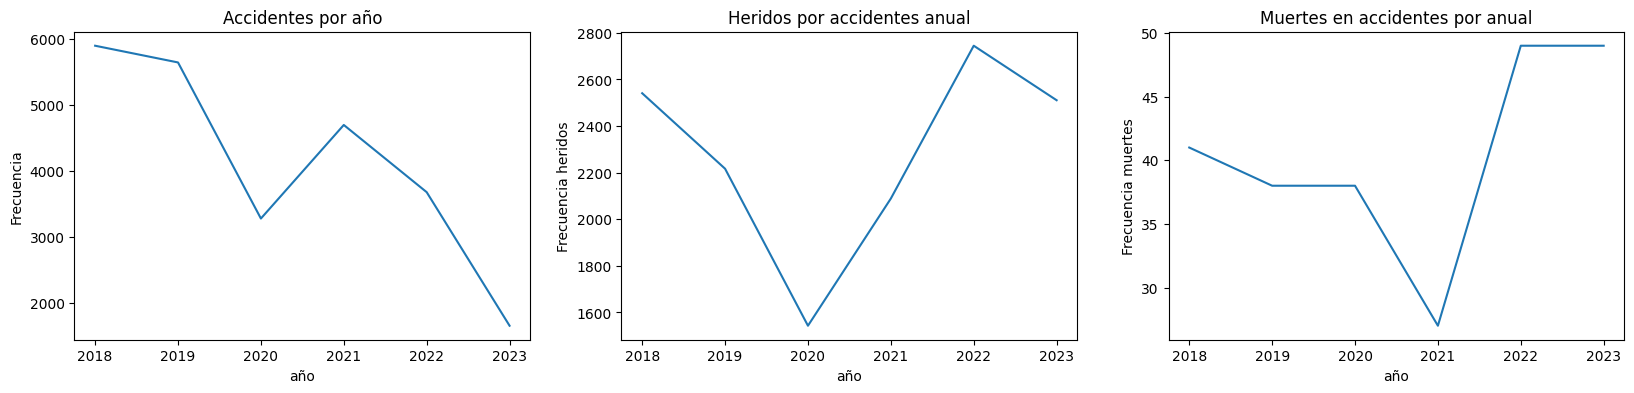

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1) # Primer argumento: n° de filas, segundo: n° de columnas, tercero: posición del próximo gráfico
plt.plot("ano_accidente","cantidad_accidentes", data=resum_col_1)
plt.title(label="Accidentes por año")
plt.xlabel("año")
plt.ylabel("Frecuencia")

plt.subplot(1,3,2) # Primer argumento: n° de filas, segundo: n° de columnas, tercero: posición del próximo gráfico
plt.plot("ano_accidente","cant_heridos_en_sitio_accidente", data=resum_col_1)
plt.title(label="Heridos por accidentes anual")
plt.xlabel("año")
plt.ylabel("Frecuencia heridos")


plt.subplot(1,3,3) # Primer argumento: n° de filas, segundo: n° de columnas, tercero: posición del próximo gráfico
plt.plot("ano_accidente","cant_muertos_en_sitio_accidente", data=resum_col_1)
plt.title(label="Muertes en accidentes por anual")
plt.xlabel("año")
plt.ylabel("Frecuencia muertes")

De manera general, no se consideró el 2024 dentro del tiempo de estudio, debido a que sus observaciones son preliminares. Observamos que existe una tendencia negativa (disminución) en cuanto a la cantidad de accidentes en la ciudad. Por su parte, llama la atención que el número de heridos va en aumento, a pesar de la baja en los accidentes.

**Accidentes según mes**

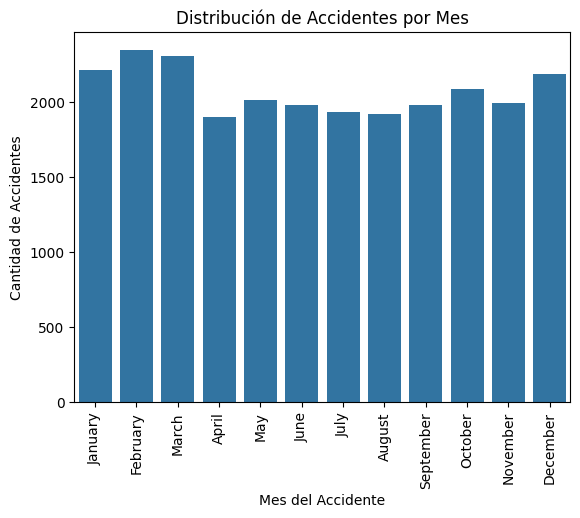

In [ ]:
# Gráfico de distribución de accidentes por mes
mes_freq = datos23['mes_accidente'].value_counts()
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
mes_freq = mes_freq.reindex(ordered_months)

sns.countplot(data=datos23, x='mes_accidente', order=mes_freq.index)
plt.title('Distribución de Accidentes por Mes')
plt.xlabel('Mes del Accidente')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de Accidentes')
plt.show()

Febrero, marzo y diciembre son los meses en los que más accidentes de ránsito se presentan, situación que puede estar asociada a festividades como carnavales y fin de año.

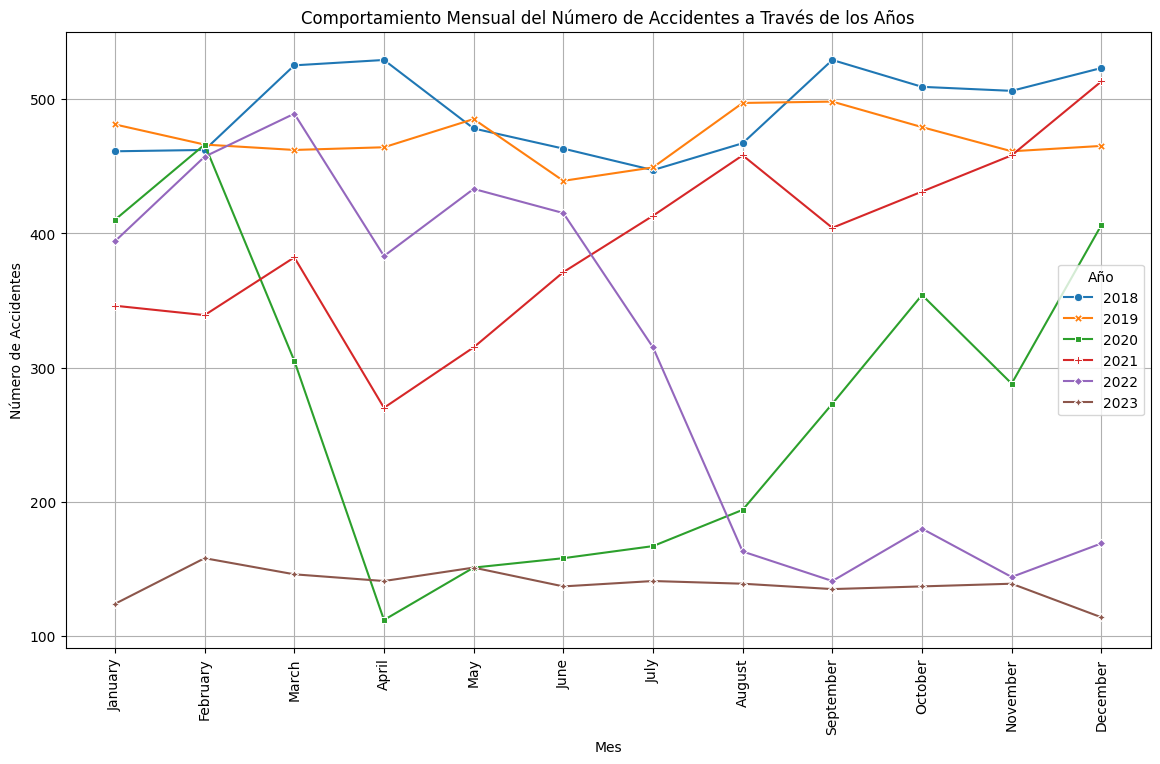

In [ ]:
# Crear una tabla pivot para contar el número de accidentes por año y mes
monthly_accidents = datos23.pivot_table(index='mes_accidente', columns='ano_accidente',
                                     values='cantidad_accidentes', aggfunc='sum')

# Reordenar los meses para que aparezcan en orden cronológico
monthly_accidents = monthly_accidents.reindex(ordered_months)

# Graficar el comportamiento mensual a través de los años
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_accidents, dashes=False, markers=True, palette="tab10")
plt.title("Comportamiento Mensual del Número de Accidentes a Través de los Años")
plt.xlabel("Mes")
plt.ylabel("Número de Accidentes")
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.grid(True)
plt.show()

**Año y clase de accidente**

In [ ]:
# tabla cruzada de frecuencia absolutas teniendo en cuenta el año del accidente y la clase de accidente
import  pandas as  pd
import  seaborn  as  sns

pd.crosstab(Datos.ano_accidente, Datos.clase_accidente, margins=True, margins_name="Total")


clase_accidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,Total
ano_accidente,,,,,,,
2018,284,30,5539,4,20,21,5898
2019,229,30,5343,3,24,16,5645
2020,163,16,3060,1,26,15,3281
2021,155,33,4477,2,21,12,4700
2022,221,33,3395,2,12,20,3683
2023,184,39,1400,1,17,21,1662
2024,108,13,605,0,3,12,741
Total,1344,194,23819,13,123,117,25610


In [ ]:
#tabla cruzada de frecuencia porcential para los totales teniendo en cuenta el año del accidente y la clase de accidente
pf1=pd.crosstab(Datos.ano_accidente, Datos.clase_accidente, normalize=True, margins=True, margins_name="Total")
round(pf1*100,2)


clase_accidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,Total
ano_accidente,,,,,,,
2018,1.11,0.12,21.63,0.02,0.08,0.08,23.03
2019,0.89,0.12,20.86,0.01,0.09,0.06,22.04
2020,0.64,0.06,11.95,0.00,0.10,0.06,12.81
2021,0.61,0.13,17.48,0.01,0.08,0.05,18.35
2022,0.86,0.13,13.26,0.01,0.05,0.08,14.38
2023,0.72,0.15,5.47,0.00,0.07,0.08,6.49
2024,0.42,0.05,2.36,0.00,0.01,0.05,2.89
Total,5.25,0.76,93.01,0.05,0.48,0.46,100.00


Los choques y atropellos son los principales tipos de accidentes en la ciudad.

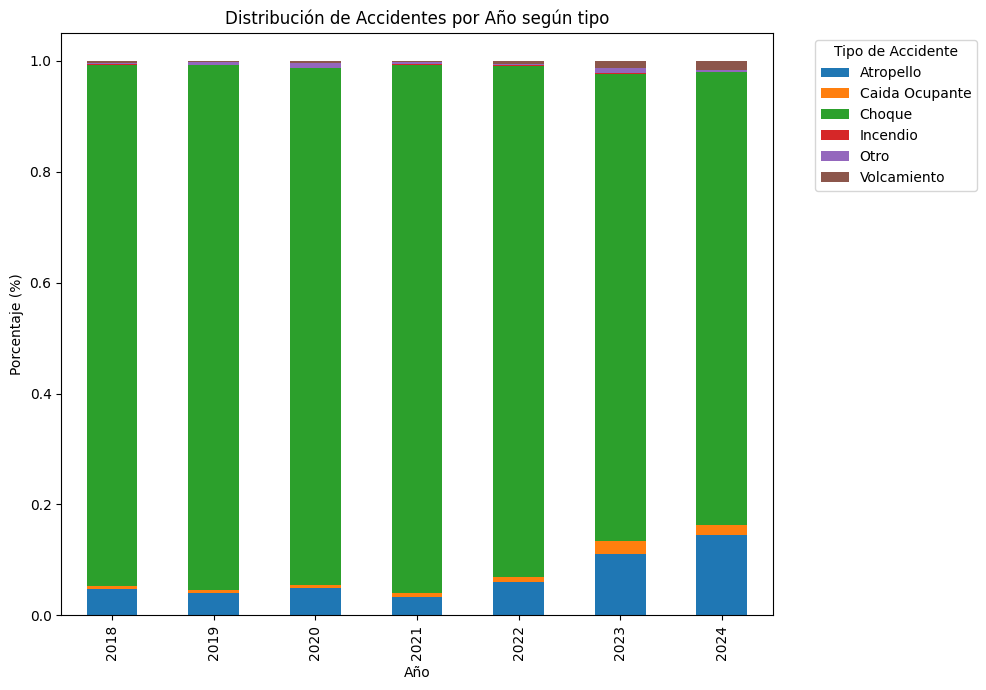

In [ ]:
#Diagrama de barras  con respecto a la clase de accidente por año
#tabla cruzada de frecuencia porcential para los totales teniendo en cuenta el año del accidente y la clase de accidente
pf=pd.crosstab(Datos.ano_accidente, Datos.clase_accidente, normalize='index', margins=False)
round(pf*100,2)

pf.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Distribución de Accidentes por Año según tipo')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Tipo de Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Para ajustar el diseño y que no se corten las etiquetas

# Mostrar el gráfico
plt.show()

Durante los períodos de estudio se observó que la probabilidad de tener un accidente de tránsito dado que la causa es por choque fue mayor del 50%, en cada año. Por su parte, la proporción de atropellos ha presentado una tendencia creciente en los últimos tres años.

**% accidentes segun gavedad**

In [ ]:
#tabla  cruzada de frecuencia porcential para los totales teniendo en cuenta el año del accidente y la gravedad del accidente
pf=pd.crosstab(Datos.ano_accidente, Datos.gravedad_accidente, normalize='index', margins=False).query("ano_accidente < 2024")
round(pf*100,2)

gravedad_accidente,Con heridos,Con muertos,Solo daños
ano_accidente,,,
2018,29.35,0.66,69.99
2019,28.17,0.64,71.20
2020,32.22,1.16,66.63
2021,30.66,0.55,68.79
2022,47.60,1.28,51.13
2023,96.69,2.95,0.36


Los accidentes de sólo daños son los más frecuentes

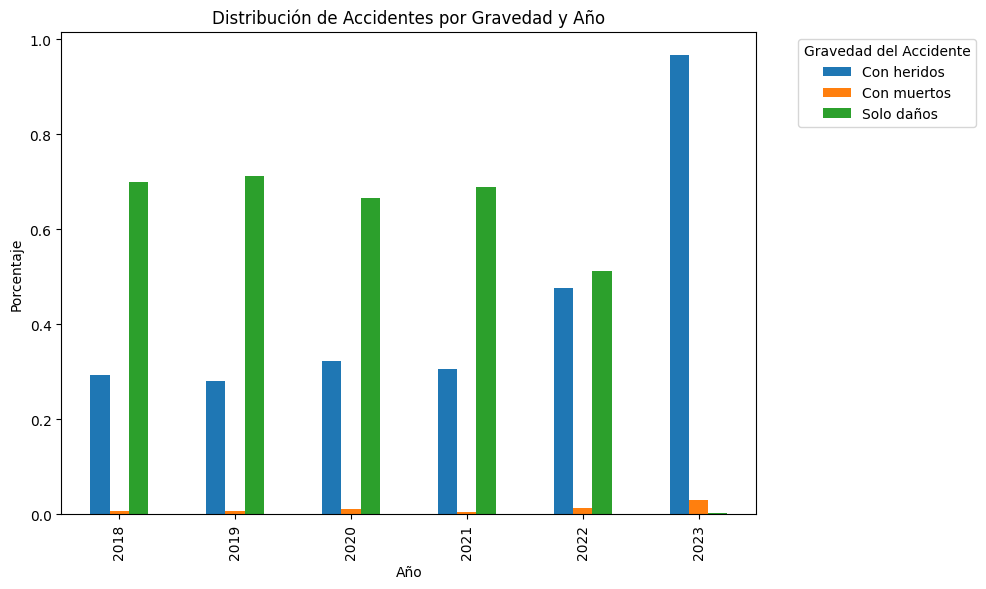

In [ ]:
# Creamos el gráfico
ax = pf.plot(kind="bar", stacked=False, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Añadimos título y etiquetas
ax.set_title("Distribución de Accidentes por Gravedad y Año")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje")

# Añadimos leyenda
plt.legend(title="Gravedad del Accidente", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Por lo general, es más común que los accidentes en su mayoría generen sólo daños materiales, sin embargo, en el año 2023 se observa un cambio abrupto en cuanto a la gravedad. Para este año, los accidentes con herido se duplican y aquellos que generan sólo daños representan menos de un 1% por lo que es pertienente **revisar la base de datos o la manera en cómo se ingresó la información durante 2023.**

Para la variable día de la semana se debe tener en cuenta el orden cronológico para ello se organizan las categorías de la misma:

In [ ]:
Datos["dia_accidente"].unique()

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
Categories (7, object): ['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

In [ ]:
# para homogenizar los nombres de las categorias de la variable día del accidente recorremos cada elemento de la varible reemplazando los acentos
mal_car = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü']  # Caracteres que queremos cambiar
bien_car = ['a', 'e', 'i', 'o', 'u', 'n', 'u'] # Caracteres por los que queremos cambiar

for j in range(len(mal_car)):  # Este for recorre cada elemento de cada municipio reemplazando los caracteres malos
    Datos["dia_accidente"] = Datos["dia_accidente"].str.replace(mal_car[j], bien_car[j]).str.lower() # Reemplazamos los caracteres
                                                                           # y los ponemos en minúscula

In [ ]:
#convertimos la variable día del accidente en categórica
Datos["dia_accidente"] = Datos["dia_accidente"].astype("category")

# Luego definimos el nuevo orden:
nuevo_orden_dia = ['mon', 'tue', 'wed', 'thu','fri', 'sat','sun']

# Guardamos el nuevo orden:
Datos["dia_accidente"] = Datos["dia_accidente"].cat.reorder_categories(nuevo_orden_dia)

Tabla de frecuencias para los accidentes según día de la semana:

In [ ]:
# Realizamos un resumen estadístico para determinar la evolución del número de accidentes, número de heridos y de muertos durante los día de la semana.
resum_col_3 = Datos.groupby("dia_accidente").sum()[["cantidad_accidentes"]]

resum_col_3

,cantidad_accidentes
dia_accidente,
mon,3774
tue,4009
wed,3839
thu,3758
fri,3920
sat,3738
sun,2577


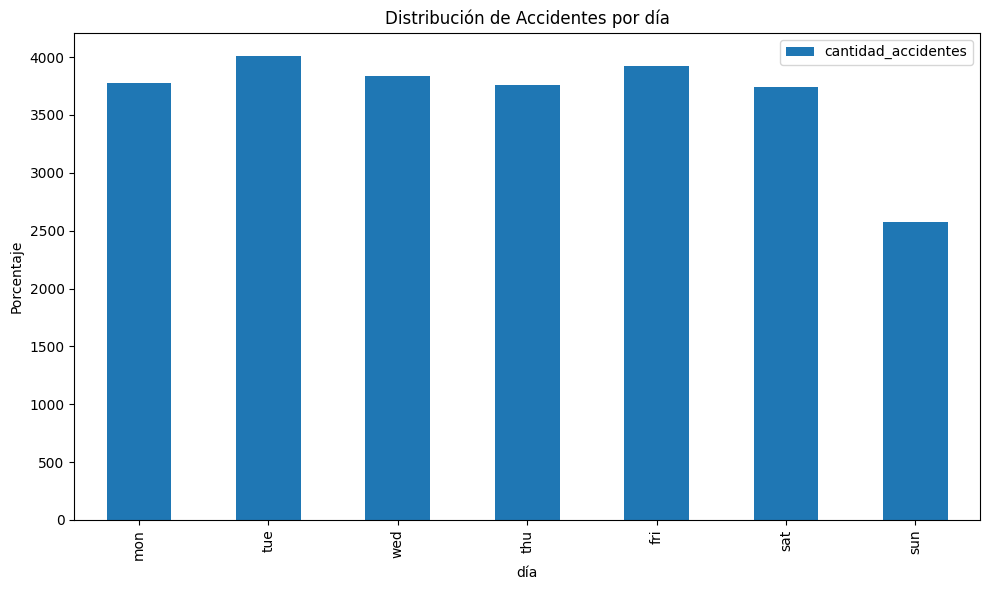

In [ ]:
# Creamos el gráfico
ax = resum_col_3.plot(kind="bar", stacked=False, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Añadimos título y etiquetas
ax.set_title("Distribución de Accidentes por día")
ax.set_xlabel("día")
ax.set_ylabel("Porcentaje")

# Mostramos el gráfico
plt.tight_layout()
plt.show()

 De acuerdo al análisis en las tablas los días martes y viernes se registraron la mayor cantidad de accidentes de tránsito y el domingo resgristró menor cantidad de accidentes.

#**4. Conclusiones:**

El análisis de la accidentalidad en Barranquilla para 2024 muestra una prevalencia de accidentes automovilísticos, especialmente choques, que representan la mayor parte de los incidentes registrados. La mayoría de accidentes resultan en daños materiales, pero sin consecuencias más graves, esto sugiere que la seguridad vial podría mejorarse con medidas preventivas enfocadas en la reducción de colisiones simples, tales como señales, claras, auxiliares de movilidad, mejoramiento de vía, entre otras.

Además, la variabilidad en la ocurrencia de accidentes según el día de la semana y el mes indica patrones temporales que podrían estar relacionados con factores como el tráfico en horas pico, o eventos especiales como el Carnaval.